In [94]:
#import all packages
import pandas as pd
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import *
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import *
import xgboost as xgb
from xgboost import *
from sklearn.model_selection import *

# Extract data from csv file

In [95]:
df_train1=pd.read_csv('Train_Dataset.csv')
df_test=pd.read_csv('Test_Dataset.csv')

In [96]:
df_train1.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [97]:
df_train1.shape

(7810, 22)

In [98]:
df_train1.iloc[5180:].isnull().sum()

EmployeeID            2630
Attrition             2630
Age                   2630
TravelProfile         2630
Department            2630
HomeToWork            2630
EducationField        2630
Gender                2630
HourlnWeek            2630
Involvement           2630
WorkLifeBalance       2630
Designation           2630
JobSatisfaction       2630
ESOPs                 2630
NumCompaniesWorked    2630
OverTime              2630
SalaryHikelastYear    2630
WorkExperience        2630
LastPromotion         2630
CurrentProfile        2630
MaritalStatus         2630
MonthlyIncome         2630
dtype: int64

there are only null values in this 2630 rows so we can drop them

# after removing null values

In [100]:
df_train=df_train1.iloc[0:5180].copy()

In [101]:
df_train.shape

(5180, 22)

In [102]:
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [103]:
df_test.columns

Index(['EmployeeID', 'Age', 'TravelProfile', 'Department', 'HomeToWork',
       'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [104]:
df_train.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [105]:
df_test.shape

(2630, 21)

In [106]:
df_train.shape

(5180, 22)

# treating null values in train and test data

In [107]:
df_train.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [108]:
df_train.select_dtypes(include=np.number).head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,5110001.0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,18932.0
1,5110002.0,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,18785.0
2,5110003.0,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,22091.0
3,5110004.0,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,20302.0
4,5110005.0,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,21674.0


we can take mean of Age,HomeToWork,HourlnWeek,SalaryHikelastYear, WorkExperience, LastPromotion,CurrentProfile, NumCompaniesWorked, MonthlyIncome to fill nan value

we can take mode of Department, Gender, Designation to fill nan value

In [109]:
df_train.replace('NaN',np.NaN,inplace=True)

In [110]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [111]:
df_train['HomeToWork'].fillna(df_train['HomeToWork'].mean(),inplace=True)

In [112]:
df_train['HourlnWeek'].fillna(df_train['HourlnWeek'].mean(),inplace=True)

In [113]:
df_train['SalaryHikelastYear'].fillna(df_train['SalaryHikelastYear'].mean(),inplace=True)

In [114]:
df_train['WorkExperience'].fillna(df_train['WorkExperience'].mean(),inplace=True)

In [115]:
df_train['LastPromotion'].fillna(df_train['LastPromotion'].mean(),inplace=True)

In [116]:
df_train['CurrentProfile'].fillna(df_train['CurrentProfile'].mean(),inplace=True)

In [117]:
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].mean(),inplace=True)

In [118]:
df_train.Department.value_counts()

Analytics    3219
Sales        1615
Marketing     222
Name: Department, dtype: int64

In [119]:
df_train['Department'].mode()

0    Analytics
dtype: object

In [120]:
df_train['Department'].fillna('Analytics',inplace=True)

In [121]:
df_train.Gender.value_counts()

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64

In [122]:
df_train['Gender'].replace('F','Female',inplace=True)

In [123]:
df_train['Gender'].fillna('Male',inplace=True)

In [124]:
df_train['Designation'].value_counts()

Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: Designation, dtype: int64

In [125]:
df_train['Designation'].mode()

0    Executive
dtype: object

In [126]:
df_train['Designation'].fillna('Executive',inplace=True)

In [127]:
df_train['MaritalStatus'].value_counts()

Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64

In [128]:
df_train['MaritalStatus'].replace('M','Married',inplace=True)

In [129]:
df_train.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [130]:
df_test.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [131]:
df_test.replace('NaN',np.NaN,inplace=True)

In [132]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

df_test['HomeToWork'].fillna(df_test['HomeToWork'].mean(),inplace=True)

df_test['HourlnWeek'].fillna(df_test['HourlnWeek'].mean(),inplace=True)

df_test['SalaryHikelastYear'].fillna(df_test['SalaryHikelastYear'].mean(),inplace=True)

df_test['WorkExperience'].fillna(df_test['WorkExperience'].mean(),inplace=True)

df_test['LastPromotion'].fillna(df_test['LastPromotion'].mean(),inplace=True)

df_test['CurrentProfile'].fillna(df_test['CurrentProfile'].mean(),inplace=True)

df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].mean(),inplace=True)

In [133]:
df_test.Department.value_counts()

Analytics    1675
Sales         792
Marketing     105
Name: Department, dtype: int64

In [134]:
df_test['Department'].mode()

0    Analytics
dtype: object

In [135]:
df_test['Department'].fillna('Analytics',inplace=True)

In [136]:
df_test.Gender.value_counts()

Male      1574
Female     682
F          344
Name: Gender, dtype: int64

In [137]:
df_test['Gender'].replace('F','Female',inplace=True)

In [138]:
df_test['Gender'].fillna('Male',inplace=True)

In [139]:
df_test['Designation'].value_counts()

Executive         993
Manager           920
Senior Manager    391
AVP               179
VP                117
Name: Designation, dtype: int64

In [140]:
df_test['Designation'].fillna('Executive',inplace=True)

In [141]:
df_test['Designation'].mode()

0    Executive
dtype: object

In [142]:
df_test['MaritalStatus'].value_counts()

Single      933
Married     841
Divorsed    477
M           379
Name: MaritalStatus, dtype: int64

In [143]:
df_test['MaritalStatus'].replace('M','Married',inplace=True)

In [144]:
df_test.isnull().sum()

EmployeeID            0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [145]:
df_train.shape

(5180, 22)

In [146]:
df_test.shape

(2630, 21)

In [147]:
df_train.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

# Grouping age into A,B,C,D

In [148]:
df_train['Age_group']=['A' if  18<=i<31 else 'B' if 31<=i<41 else 'C' if 41<=i<51 else 'D' for i in df_train.Age]
df_train.Age_group.value_counts()

B    2385
A    1232
C    1049
D     514
Name: Age_group, dtype: int64

In [149]:
df_test['Age_group']=['A' if  18<=i<31 else 'B' if 31<=i<41 else 'C' if 41<=i<51 else 'D' for i in df_test.Age]
df_test.Age_group.value_counts()

B    1148
A     615
C     585
D     282
Name: Age_group, dtype: int64

only outlier in employee id which is not required

In [150]:
df_train=df_train.drop(['EmployeeID'],axis=1)
df_test=df_test.drop(['EmployeeID'],axis=1)
df_train=df_train.drop(['Age'],axis=1)
df_test=df_test.drop(['Age'],axis=1)


In [151]:
#Q1=df_train.quantile(0.25)
#Q3=df_train.quantile(0.75)
#IQR=Q3-Q1
#df_train=df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_train.head()

In [152]:
df_train.columns

Index(['Attrition', 'TravelProfile', 'Department', 'HomeToWork',
       'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome', 'Age_group'],
      dtype='object')

In [153]:
df_train.shape

(5180, 21)

In [154]:
df_test.shape

(2630, 20)

# checking correlation

<IPython.core.display.Javascript object>

<AxesSubplot:>

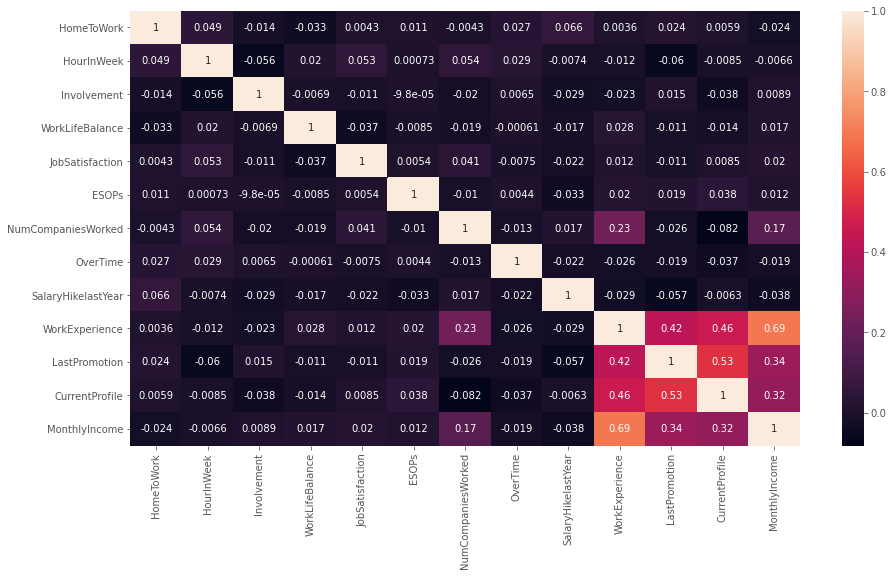

In [156]:
plt.figure(figsize = (15,8))
sns.heatmap(df_test.corr(),annot=True)

# Scaling the numerical datas into standardize form

In [157]:
df_train_number=df_train[['HomeToWork', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile',
       'MonthlyIncome']]
df_train_number.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,18932.0
1,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,18785.0
2,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,22091.0
3,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,20302.0
4,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,21674.0


In [158]:
df_train_number = df_train_number.apply(lambda rec: (rec - rec.mean()) / rec.std())
df_train_number.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,-0.740761,0.872445,-2.552226,-1.426867,-1.596991,1.019003,-0.827823,1.479606,-0.178130,-0.544147,-0.172088,-6.330852e-15,-0.583867
1,-0.740761,0.318272,0.886441,-0.009033,-0.852265,-0.981162,1.858249,-0.675725,-0.178130,-0.936011,-0.483368,-6.330852e-15,-0.614961
2,-0.740761,-1.027577,2.032664,-0.009033,-0.852265,1.019003,-0.060374,-0.675725,1.467738,0.108960,-0.483368,-3.949700e-01,0.084335
3,-0.134317,-2.056756,-0.259781,-0.717950,0.637186,1.019003,-0.827823,-0.675725,0.644804,-0.805390,-0.483368,-3.949700e-01,-0.294080
4,1.927593,-0.710907,-0.259781,0.699885,0.637186,1.019003,1.858249,-0.675725,0.096181,0.108960,-0.483368,1.315727e+00,-0.003870


In [159]:
df_test_number=df_test[['HomeToWork', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile',
       'MonthlyIncome']]
df_test_number.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,9.0,80.0,3,2,3,1,1,0,17.0,0.0,0.0,0.000000,16904.0
1,28.0,59.0,1,3,1,1,2,1,18.0,2.0,1.0,4.506811,18994.0
2,19.0,76.0,3,3,5,0,5,1,22.0,18.0,3.0,3.000000,18587.0
3,23.0,73.0,5,2,3,0,4,1,17.0,5.0,3.0,3.000000,20559.0
4,7.0,42.0,4,1,5,1,4,0,20.0,9.0,1.0,7.000000,24991.0


In [160]:
df_test_number = df_test_number.apply(lambda rec: (rec - rec.mean()) / rec.std())
df_test_number.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,-0.281237,1.717670,-0.270935,-0.754791,-0.086405,0.989974,-0.834486,-0.701737,-0.994128,-1.452568,-0.814416,-1.290295e+00,-0.972232
1,1.919445,0.088203,-2.533026,-0.048852,-1.581442,0.989974,-0.459067,1.424494,-0.720778,-1.200507,-0.508371,2.797128e-15,-0.559234
2,0.877016,1.407296,-0.270935,-0.048852,1.408632,-1.009743,0.667189,1.424494,0.372623,0.815983,0.103720,-4.313981e-01,-0.639660
3,1.340318,1.174515,1.991156,-0.754791,-0.086405,-1.009743,0.291770,1.424494,-0.994128,-0.822415,0.103720,-4.313981e-01,-0.249980
4,-0.512888,-1.230890,0.860111,-1.460731,1.408632,0.989974,0.291770,-0.701737,-0.174078,-0.318293,-0.508371,7.137970e-01,0.625812


# Encoding the Categorical Datas

In [161]:
le = preprocessing.LabelEncoder()

In [162]:
df_train.select_dtypes(include=np.object).columns

<ipython-input-162-256dc80e9bf3>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train.select_dtypes(include=np.object).columns


Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus', 'Age_group'],
      dtype='object')

In [163]:
df_train.TravelProfile = le.fit_transform(df_train.TravelProfile)
df_train.Department = le.fit_transform(df_train.Department)
df_train.EducationField = le.fit_transform(df_train.EducationField)
df_train.Gender = le.fit_transform(df_train.Gender)
df_train.Designation = le.fit_transform(df_train.Designation)
df_train.MaritalStatus = le.fit_transform(df_train.MaritalStatus)
df_train.Age_group = le.fit_transform(df_train.Age_group)

In [164]:
df_train.head()

,Attrition,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Age_group
0,0.0,1,0,5.0,0,1,69.0,1.0,1.0,1,...,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,1,18932.0,1
1,1.0,2,2,5.0,5,0,62.0,4.0,3.0,1,...,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,2,18785.0,1
2,0.0,1,0,5.0,5,0,45.0,5.0,3.0,2,...,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,2,22091.0,1
3,0.0,2,2,10.0,5,0,32.0,3.0,2.0,2,...,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,0,20302.0,1
4,0.0,0,0,27.0,5,0,49.0,3.0,4.0,2,...,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,0,21674.0,1


In [165]:
df_encoded=df_train[['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus', 'Age_group']]
df_encoded.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,Age_group
0,1,0,0,1,1,1,1
1,2,2,5,0,1,2,1
2,1,0,5,0,2,2,1
3,2,2,5,0,2,0,1
4,0,0,5,0,2,0,1


In [166]:
X_train=pd.concat([df_train_number, df_encoded], axis=1)
X_train.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,Age_group
0,-0.740761,0.872445,-2.552226,-1.426867,-1.596991,1.019003,-0.827823,1.479606,-0.178130,-0.544147,-0.172088,-6.330852e-15,-0.583867,1,0,0,1,1,1,1
1,-0.740761,0.318272,0.886441,-0.009033,-0.852265,-0.981162,1.858249,-0.675725,-0.178130,-0.936011,-0.483368,-6.330852e-15,-0.614961,2,2,5,0,1,2,1
2,-0.740761,-1.027577,2.032664,-0.009033,-0.852265,1.019003,-0.060374,-0.675725,1.467738,0.108960,-0.483368,-3.949700e-01,0.084335,1,0,5,0,2,2,1
3,-0.134317,-2.056756,-0.259781,-0.717950,0.637186,1.019003,-0.827823,-0.675725,0.644804,-0.805390,-0.483368,-3.949700e-01,-0.294080,2,2,5,0,2,0,1
4,1.927593,-0.710907,-0.259781,0.699885,0.637186,1.019003,1.858249,-0.675725,0.096181,0.108960,-0.483368,1.315727e+00,-0.003870,0,0,5,0,2,0,1


In [167]:
X_train.shape

(5180, 20)

In [168]:
df_test.select_dtypes(include=np.object).columns

<ipython-input-168-77903a655343>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_test.select_dtypes(include=np.object).columns


Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus', 'Age_group'],
      dtype='object')

In [169]:
df_test.TravelProfile = le.fit_transform(df_test.TravelProfile)
df_test.Department = le.fit_transform(df_test.Department)
df_test.EducationField = le.fit_transform(df_test.EducationField)
df_test.Gender = le.fit_transform(df_test.Gender)
df_test.Designation = le.fit_transform(df_test.Designation)
df_test.MaritalStatus = le.fit_transform(df_test.MaritalStatus)
df_test.Age_group = le.fit_transform(df_test.Age_group)

In [170]:
df_test.head()

,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Age_group
0,0,0,9.0,0,1,80.0,3,2,1,3,1,1,0,17.0,0.0,0.0,0.000000,2,16904.0,0
1,1,0,28.0,5,0,59.0,1,3,1,1,1,2,1,18.0,2.0,1.0,4.506811,2,18994.0,0
2,1,0,19.0,0,0,76.0,3,3,1,5,0,5,1,22.0,18.0,3.0,3.000000,1,18587.0,2
3,1,2,23.0,5,0,73.0,5,2,2,3,0,4,1,17.0,5.0,3.0,3.000000,1,20559.0,1
4,1,0,7.0,0,1,42.0,4,1,3,5,1,4,0,20.0,9.0,1.0,7.000000,1,24991.0,1


In [171]:
df_encoded1=df_test[['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Designation', 'MaritalStatus', 'Age_group']]
df_encoded1.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,Age_group
0,0,0,0,1,1,2,0
1,1,0,5,0,1,2,0
2,1,0,0,0,1,1,2
3,1,2,5,0,2,1,1
4,1,0,0,1,3,1,1


In [172]:
X_test=pd.concat([df_test_number, df_encoded1], axis=1)
X_test.head()

,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,Age_group
0,-0.281237,1.717670,-0.270935,-0.754791,-0.086405,0.989974,-0.834486,-0.701737,-0.994128,-1.452568,-0.814416,-1.290295e+00,-0.972232,0,0,0,1,1,2,0
1,1.919445,0.088203,-2.533026,-0.048852,-1.581442,0.989974,-0.459067,1.424494,-0.720778,-1.200507,-0.508371,2.797128e-15,-0.559234,1,0,5,0,1,2,0
2,0.877016,1.407296,-0.270935,-0.048852,1.408632,-1.009743,0.667189,1.424494,0.372623,0.815983,0.103720,-4.313981e-01,-0.639660,1,0,0,0,1,1,2
3,1.340318,1.174515,1.991156,-0.754791,-0.086405,-1.009743,0.291770,1.424494,-0.994128,-0.822415,0.103720,-4.313981e-01,-0.249980,1,2,5,0,2,1,1
4,-0.512888,-1.230890,0.860111,-1.460731,1.408632,0.989974,0.291770,-0.701737,-0.174078,-0.318293,-0.508371,7.137970e-01,0.625812,1,0,0,1,3,1,1


In [173]:
X_test.shape

(2630, 20)

In [174]:
y_train=df_train['Attrition']
y_train.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

In [175]:
X_train.shape,X_test.shape,y_train.shape

((5180, 20), (2630, 20), (5180,))

# new data

In [176]:
df_newmodel=pd.read_csv('Test_Dataset.csv')

In [177]:
df_new=df_newmodel['EmployeeID']

# Performing Random Forest Classifier to get the Best Result of the Model

In [178]:
rf = RandomForestClassifier( n_estimators = 500, criterion = 'entropy', random_state = 0)

<IPython.core.display.Javascript object>

In [179]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [86]:
rf.score(X_train, y_train)

1.0

In [87]:
pred = rf.predict(X_test)

In [88]:
df_predict1 = pd.DataFrame(pred, columns =['Attrition'])

In [89]:
df_new_predict_test1=pd.concat([df_new,df_predict1],axis=1)

In [ ]:
df_new_predict_test1.to_csv('newdata123.csv',index=False)

# Performing Random Search to get the Best Parameters of Random Forest

In [182]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [183]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [184]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [185]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [180]:
rf1 = RandomForestClassifier(n_estimators= 400, min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False, random_state=42, n_jobs = -1)

<IPython.core.display.Javascript object>

# fit the data and transfer into Excel

In [181]:
rf1.fit(X_train, y_train)

rf1.score(X_train, y_train)

pred1 = rf1.predict(X_test)

df_predict11 = pd.DataFrame(pred1, columns =['Attrition'])

df_new_predict_test11=pd.concat([df_new,df_predict11],axis=1)

df_new_predict_test11.to_csv('peredicted.csv',index=False)